# マルコフの不等式

In [2]:
from shiori.utils.viewer import set_plot_params, sns, plt
from shiori.utils.path import ProjectPath
from pathlib import Path
import numpy as np
from matplotlib import animation
from math import gamma
from scipy.stats import chi2
import math
set_plot_params()
name = Path().cwd().name + "/markov"
proj = ProjectPath(save_dst=name)
save_dir = proj.save_dir
save_dir.mkdir(parents=True, exist_ok=True)
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})


In [4]:
# Domain
a = np.linspace(0.1, 4.0, 400)

# Helpers
def tail_abs_standard_normal(x):  # P(|Z| >= x)
    return math.erfc(x / math.sqrt(2.0))

def tail_one_sided_standard_normal(x):  # P(Z >= x)
    return 0.5 * math.erfc(x / math.sqrt(2.0))

# Two-sided: apply Markov to |X|
E_absZ = math.sqrt(2.0 / math.pi)          # E|Z|
tail_abs = np.array([tail_abs_standard_normal(x) for x in a])
markov_abs = E_absZ / a


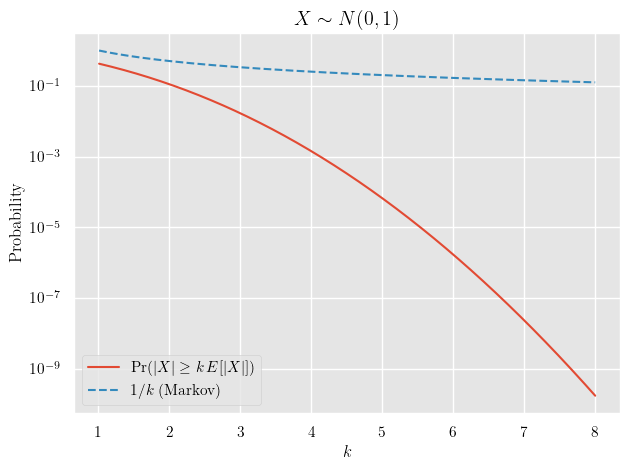

In [16]:
k = np.linspace(1.01, 8.0, 400)
E_absX = math.sqrt(2.0/math.pi) 
a_abs  = k * E_absX            
tail_abs = np.array([math.erfc(x/math.sqrt(2.0)) for x in a_abs])

bound = 1.0 / k

plt.figure()
plt.plot(k, tail_abs, label=r"$\Pr(|X|\ge k\,E[|X|])$")
plt.plot(k, bound, "--", label=r"$1/k$  (Markov)")
plt.xlabel(r"$k$")
plt.ylabel("Probability")
plt.title(r" $X\sim N(0,1)$")
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.savefig(save_dir.joinpath("markov.png"), dpi=300, facecolor="white")
plt.show()